#  <div align=center> Customer Segmentation using Data Science 

### Importing Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [26]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Adriel Joshua\College\5th Semester\Naan Mudhalvan\CustomerSegmentation-AppliedDataScience\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Information/Explaination about the dataset

#### This dataset is used in retail and marketing analytics to understand customer behavior and preferences. It includes the following types of information:

##### Customer ID

##### Gender

##### Age

##### Annual Income

##### Spending Score

 A "customer ID" (Customer Identification) is a unique identifier assigned to each customer in a database or system. It is used to distinguish one customer from another and track their activities, purchases, interactions, and other relevant information.

 Gender is one of the key factors in segmenting customers into distinct groups. For example, stores may tailor their product offerings and marketing strategies differently for male and female customers.

 Age is a fundamental factor for segmenting customers into groups. Different age groups may have distinct preferences, shopping behaviors, and income levels. For example, retailers often distinguish between teenagers, young adults, middle-aged individuals, and seniors.

 The annual income of mall customers is a crucial demographic variable that helps businesses and mall operators understand the spending capacity and shopping preferences of their customer base.

 Spending score is a metric used to assess and quantify a customer's purchasing behavior within a mall. 

### Data Preprocessing

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


The dataset contains 5 columns:


-> CustomerID

-> Gender 

-> Age

-> Annual Income

-> Spending Score
    

In [28]:
df.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for null values in the data

In [29]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing values in the data.

In [30]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


There are no duplicate values in the data.



In [31]:
df.nunique()


CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

Shows the number of unique (different) values for a given attribute in the dataset

In [33]:
df.rename(columns = {"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

Before moving on further we will rename some columns to move along easily with further visualization.



In [34]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

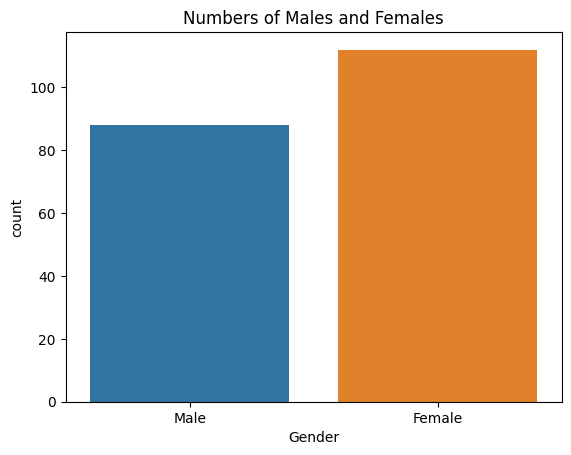

In [35]:
sns.countplot(x = 'Gender', data = df, hue = 'Gender')
plt.title("Numbers of Males and Females");

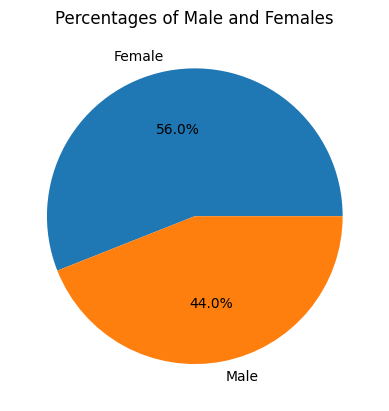

In [38]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );

Inference: From the above countplot, piechart and also from values count function we can say that there are more females than a male in our dataset.

### Checking for Outliers in the dataset

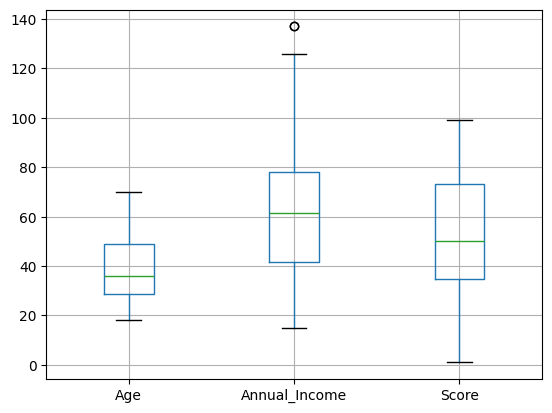

In [39]:
df.iloc[:,1:].boxplot();

As we can see that there is only one outlier present in the data. So no need to remove the outliers from the data.

### Distribution of values of attributes

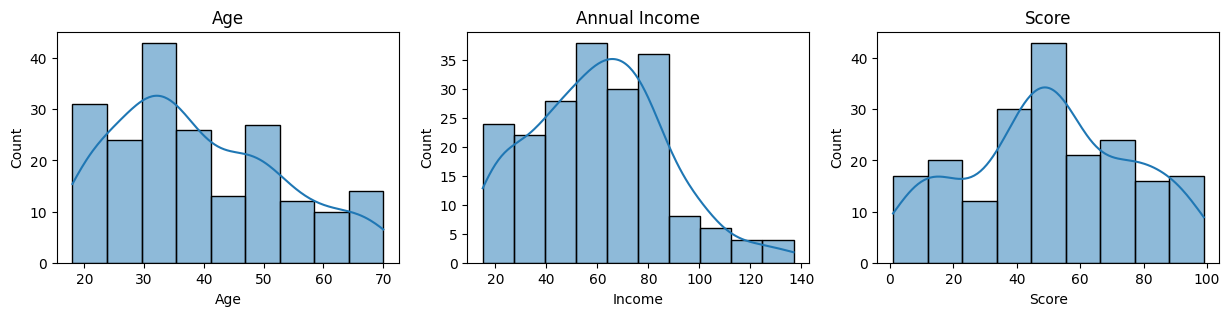

In [40]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)

sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age");


plt.subplot(1,3,2)
sns.histplot(df.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income");

plt.subplot(1, 3, 3)
sns.histplot(df.Score, kde = True)
plt.title("Score")
plt.xlabel("Score");

### Distribution of age with respect to gender

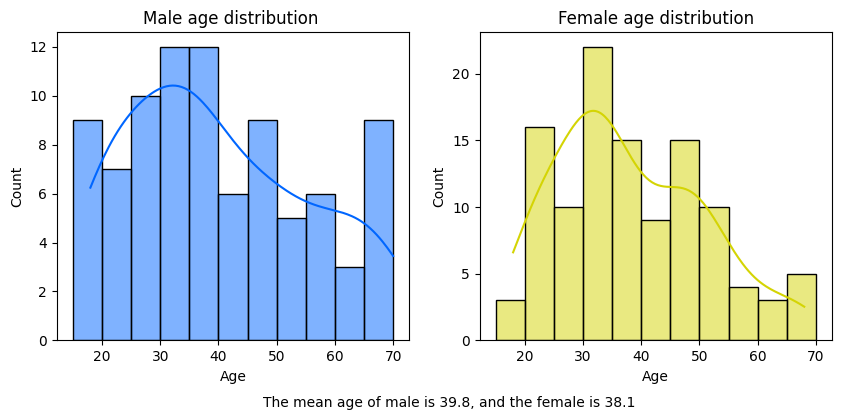

In [44]:
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"The mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

The average age of male is little bit higher than the feamale i.e (39.8 and 38.1).
Also we can see that the distribution of age in male is uniform than the female.

### Distribution of income with respect to gender

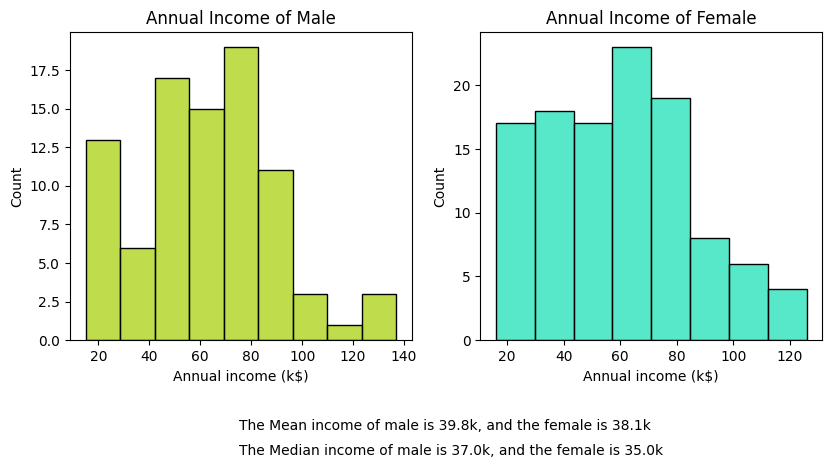

In [46]:
income_male = df[df.Gender == "Male"]["Annual_Income"]
income_female = df[df.Gender != "Male"]["Annual_Income"]

plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.histplot(income_male, color = '#A8D10E')
plt.title("Annual Income of Male")
plt.xlabel("Annual income (k$)")

plt.subplot(1,3,2)
sns.histplot(income_female, color = '#1DE1B8')
plt.title("Annual Income of Female")
plt.xlabel("Annual income (k$)")
plt.text(-75,-7,f"The Mean income of male is {round(male.mean(),1)}k, and the female is {round(female.mean(),1)}k")
plt.text(-75,-9,f"The Median income of male is {round(male.median(),1)}k, and the female is {round(female.median(),1)}k")
plt.show()

We can see that the mean and the median of male income is slightly greater than female income.

### Distribution of spending score with respect to gender

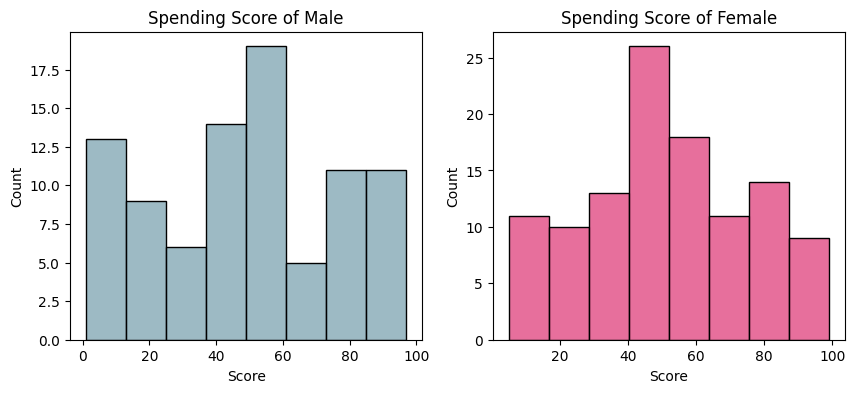

In [47]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "#7CA3B1")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = '#DF3F7B')
plt.title("Spending Score of Female")
plt.show()

We can see that the distribution of spending in female is uniform than male.

### Spending Score by age group

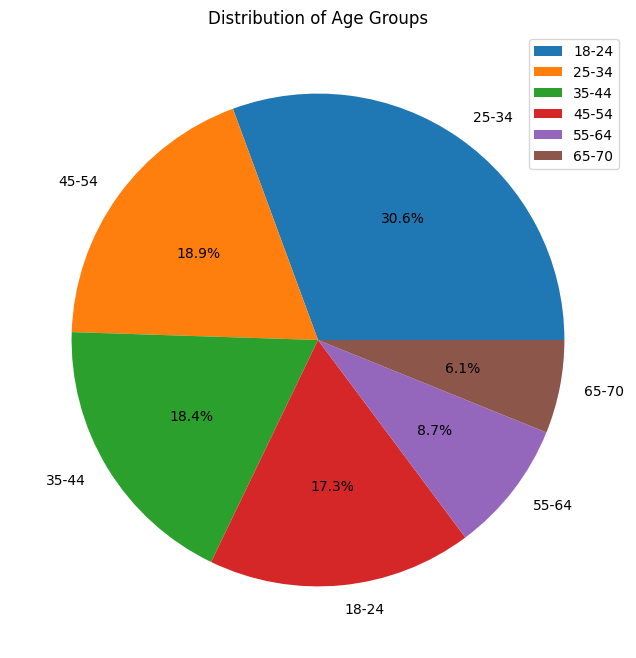

In [49]:

df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

### Calculating the mean spending score by age group

C:\Users\Admin\AppData\Local\Temp\ipykernel_10296\885886067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'vlag')


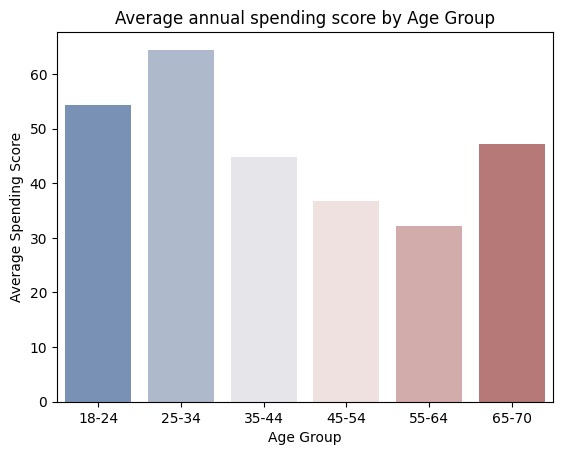

In [50]:

mean_score = df.groupby('Age_Group')['Score'].mean()

sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'vlag')
plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()

The average spending score grouped by different age groups is calculated 